# Welcome to Passion!
Passion is a model that can detection anomaly using different methods (Both supervised and unsupervised) <br>

1. The goal for this project is to study the difference between different anomnaly detection model, and to   <br>
 find the state of art method for detecting anomaly in real world data<br>
2. Evaluate the results based on this :real server data+ https://www.kaggle.com/sohier/30-years-of-european-wind-generation (Unsupervised)+ https://github.com/numenta/NAB (Unsupervised+Supervised)  https://www.cs.ucr.edu/~eamonn/time_series_data/ (Supervised) <br>
3. Also use real data generated from server.
4. The model has the following fuctions: <br>
    a. Visualize the input data. Help the user to find critical features within the inputs. <br>
    b. Give user options to choose different models that are suitable for different circumstances. <br>
    c. Evaluate the performance based on the rules in this link https://github.com/numenta/NAB <br>
    d. Save model. Easy to be appplied to other dataset. <br>

5. Add un-labeled and labeled data






# What's new in version 8.2

1. Add Wavenet for un-supervised mode


In [9]:
# import packages 


from matplotlib.pylab import rc
import torch
from scipy.stats import chisquare
from scipy.stats import pearsonr 
import pickle
import pandas as pd
import datetime
import matplotlib
import tensorflow as tf
import sklearn
import math
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
import numpy as np
from sklearn.model_selection import train_test_split 
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
import copy
import scipy
import datetime
import time
import os
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import gc
import json
plot_path = "plots/"



In [10]:

# Real server data

root_path = "Data/Ant_202007/"


cif = pd.read_json(root_path+'cif.json', orient='index')
paycore = pd.read_json(root_path+'paycore.json', orient='index')
paydecision = pd.read_json(root_path+'paydecision.json', orient='index')
paydecision2 = pd.read_json(root_path+'paydecision2.json', orient='index')
paydecision3 = pd.read_json(root_path+'paydecision3.json', orient='index')

df = pd.DataFrame()
df["time_stamp"] = cif.index
df["cif"] = cif[0].values
df["paycore"] = paycore[0].values
df["paydecision"] = paydecision[0].values
df["paydecision2"] = paydecision2[0].values
df["paydecision3"] = paydecision3[0].values

# Optional
if False:
    df.to_csv(root_path+"fusion.csv")

    
# convert time stamp
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
names_array = np.array(df.keys()[1:],dtype="str")
os.listdir(root_path)





['.ipynb_checkpoints',
 'cif.json',
 'fusion.csv',
 'paycore.json',
 'paydecision.json',
 'paydecision2.json',
 'paydecision3.json']

In [11]:
if False:
    
    # calculate previous hour high low:
    # convert to seconds
    temp = df['time_stamp'] - min(df['time_stamp'])
    temp = temp.dt.total_seconds().astype(int)
    df["hours"] = temp//3600

    h_max = max(df["hours"])+1

    for n in range(len(names_array)):
        df[names_array[n]+"_open"] = df[names_array[n]]
        df[names_array[n]+"_close"] = df[names_array[n]]
        df[names_array[n]+"_max"] = df[names_array[n]]
        df[names_array[n]+"_min"] = df[names_array[n]]

    for j in range(1,h_max):
        mask_j = df["hours"]==j-1
        max_val = df[mask_j][names_array].max(axis=0).values
        min_val = df[mask_j][names_array].max(axis=0).values
        open_val = df[mask_j][names_array].values[0,:]
        close_val = df[mask_j][names_array].values[-1,:]
        mask_i = df["hours"]==j
        r = df[mask_i][names_array].shape[0]
        df.loc[mask_i,[r+"_open" for r in names_array]] = np.tile(open_val,(r,1))
        df.loc[mask_i,[r+"_close" for r in names_array]] = np.tile(close_val,(r,1))

        df.loc[mask_i,[r+"_max" for r in names_array]] = np.tile(max_val,(r,1))
        df.loc[mask_i,[r+"_min" for r in names_array]] = np.tile(min_val,(r,1))
    
    




In [15]:
root_path = 'Data/Stocks/'
#root_path = "/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/"

stock = pd.read_csv(root_path + "googl.us.txt")
df = stock

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


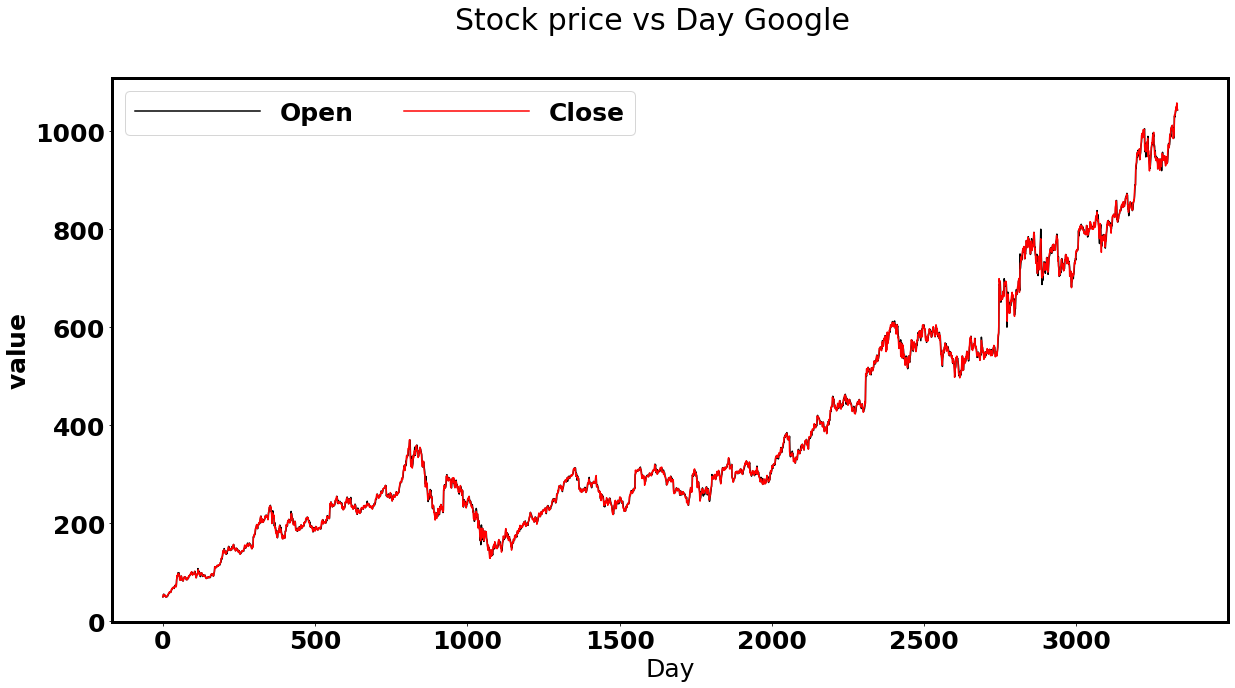

In [16]:
import matplotlib
from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


plt.subplot(1,1,1)
plt.plot(df["Open"],"k",label="Open")
plt.plot(df["Close"],"r",label="Close")


plt.xlabel("Day")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Stock price vs Day Google")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend(fontsize=25,handlelength=5,ncol=3)
plt.show()

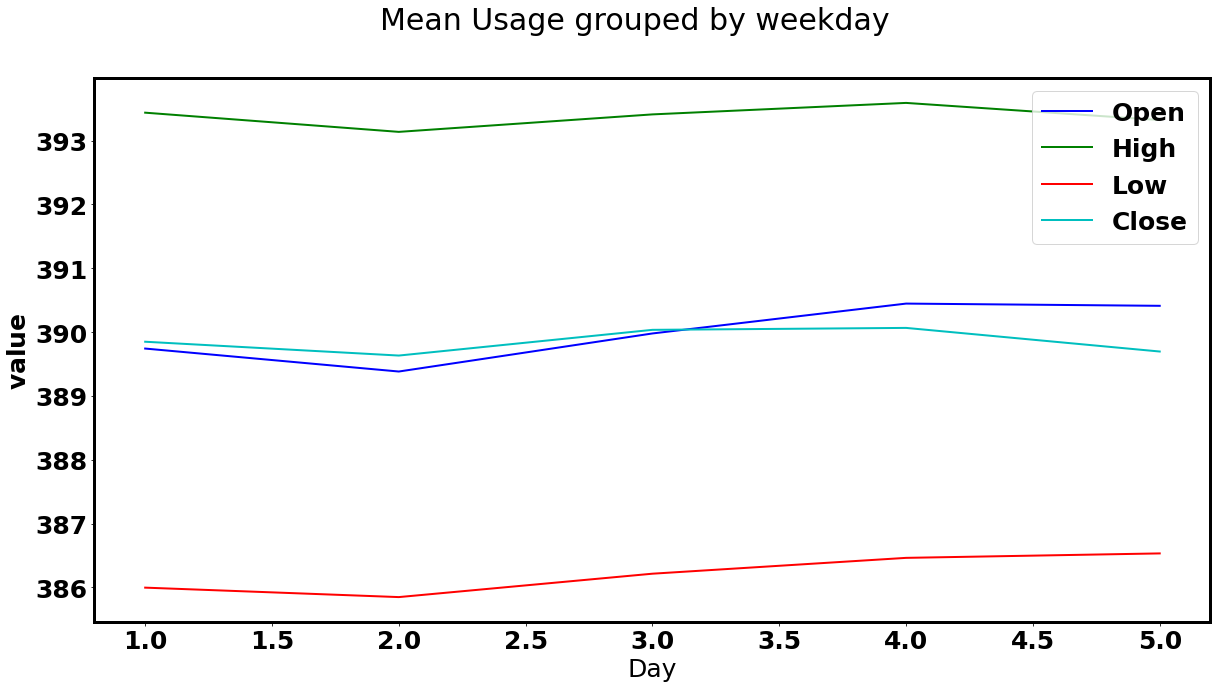

In [17]:
# Let's check whether there is a peroid in week/month?
import datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['weekday'] = df['Date'].dt.weekday
df['monthday'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.subplot(1,1,1)


names_array = list(df.keys()[1:5])
for i in range(len(names_array)):
    #print("Doing %d"%i)
    plt.plot(df.groupby('weekday').mean().index+1,df.groupby('weekday').mean()[names_array[i]],color_array[i],label=names_array[i],linewidth=2,markersize=5)
    




plt.xlabel("Day")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Mean Usage grouped by weekday")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()

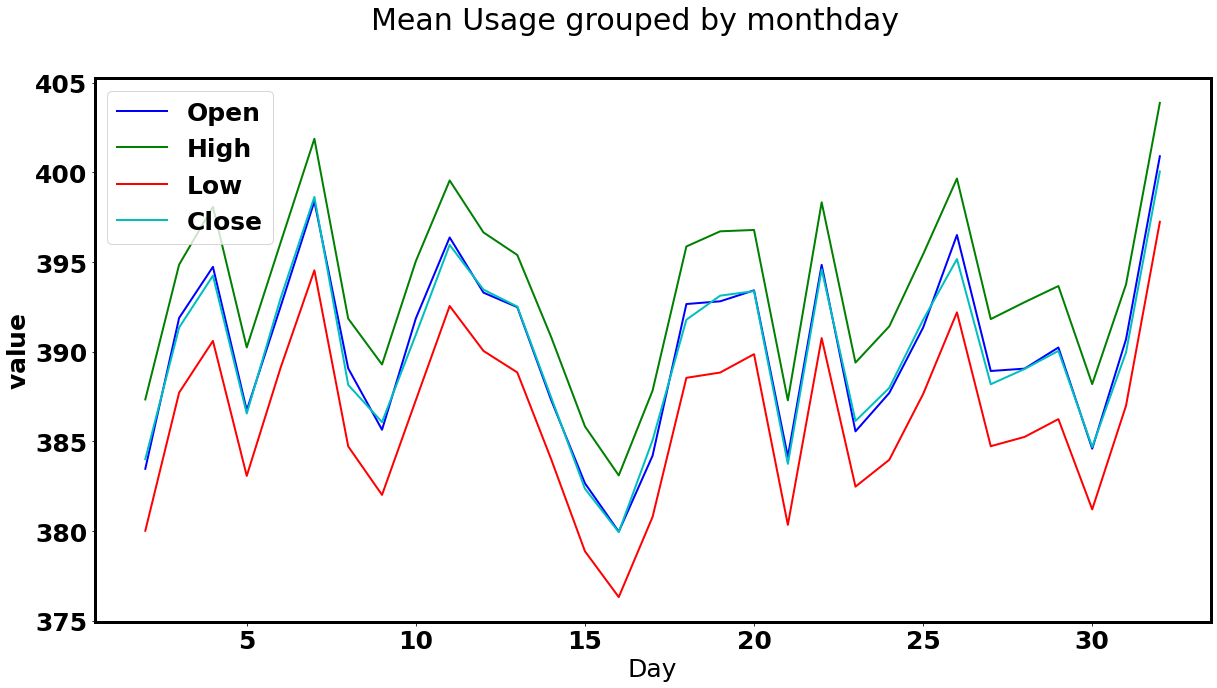

In [18]:
from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.subplot(1,1,1)


names_array = list(df.keys()[1:5])
for i in range(len(names_array)):
    #print("Doing %d"%i)
    plt.plot(df.groupby('monthday').mean().index+1,df.groupby('monthday').mean()[names_array[i]],color_array[i],label=names_array[i],linewidth=2,markersize=5)
    




plt.xlabel("Day")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Mean Usage grouped by monthday")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()

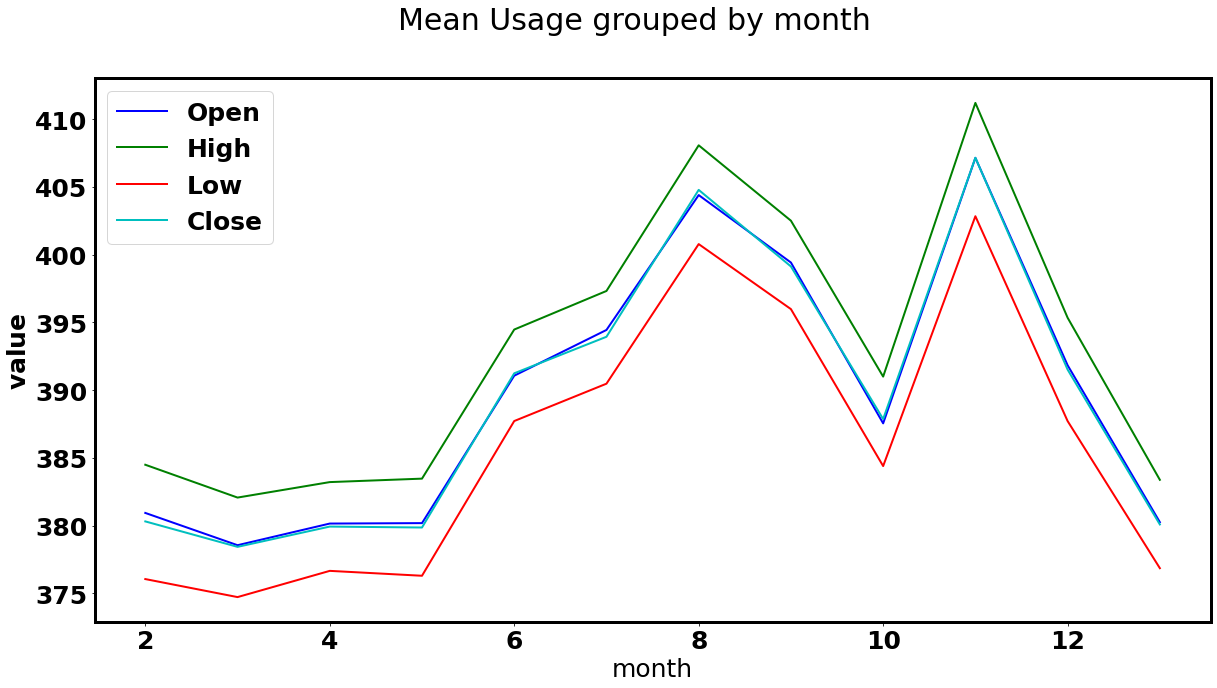

In [19]:
# By month?


from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.subplot(1,1,1)


names_array = list(df.keys()[1:5])
for i in range(len(names_array)):
    #print("Doing %d"%i)
    plt.plot(df.groupby('month').mean().index+1,df.groupby('month').mean()[names_array[i]],color_array[i],label=names_array[i],linewidth=2,markersize=5)
    




plt.xlabel("month")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Mean Usage grouped by month")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()

# baseline model: GRU+Dense layer structure:

In [20]:
from sklearn import preprocessing
from keras.models import Model
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
from keras.layers import Input,Masking,Dense,GRU
from sklearn.model_selection import train_test_split 
from keras.layers import Dropout
# some hyper parameters
# Here we use 30 day data to predict future stock price. May need to modify later
delta_t = 30
n_cell = 50
dropout_rate= 0.1
n_epoch=30
batch=256



In [21]:
checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

min_max_scaler = preprocessing.StandardScaler()

# min-max scaler
np_scaled = min_max_scaler.fit_transform(df[names_array])

df_scaled = pd.DataFrame(np_scaled,columns=names_array)


X = np.zeros((df_scaled.shape[0]-delta_t,delta_t,len(names_array)),dtype=float)
y = df_scaled["Close"][delta_t:]

  
for i in range(len(y)):
    if i%800==0:
        print("Prepare data %.2f percent"%(100*i/len(y)))
    X[i,:,:] = df_scaled[i:i+delta_t][names_array].values

# split train test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Prepare data 0.00 percent
Prepare data 24.22 percent
Prepare data 48.44 percent
Prepare data 72.66 percent
Prepare data 96.88 percent


In [23]:
def generate_model(MAX_TIMESTEPS,MAX_NB_VARIABLES):
    ip = Input(shape=(MAX_TIMESTEPS,MAX_NB_VARIABLES))
    # split into x and y two channels

    x = Masking()(ip)
    x = GRU(n_cell)(x)

    out = Dense(1)(x)
    #out = Dropout(dropout_rate)(x)
    #loc, scale = tf.keras.layers.GaussianNoise(stddev=0.01)(out)
    
    # now we only output loc
    #out=loc

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model

model = generate_model(delta_t,X.shape[2])
model.compile(loss='mae', optimizer='adam')
#model.summary()

callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train
history = model.fit(X_train, y_train, epochs=n_epoch, batch_size=batch, validation_data=(X_test, y_test),callbacks=[callback], verbose=2, shuffle=False)

# Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
y_pre = model.predict(X_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 4)]           0         
_________________________________________________________________
masking_1 (Masking)          (None, 30, 4)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                8400      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30

Epoch 00001: saving model to model/cp.ckpt
10/10 - 1s - loss: 0.4632 - val_loss: 0.1508
Epoch 2/30

Epoch 00002: saving model to model/cp.ckpt
10/10 - 0s - loss: 0.1457 - val_loss: 0.0643
Epoch 3/30

Epoch 00003: saving model to model/cp.ckpt
10

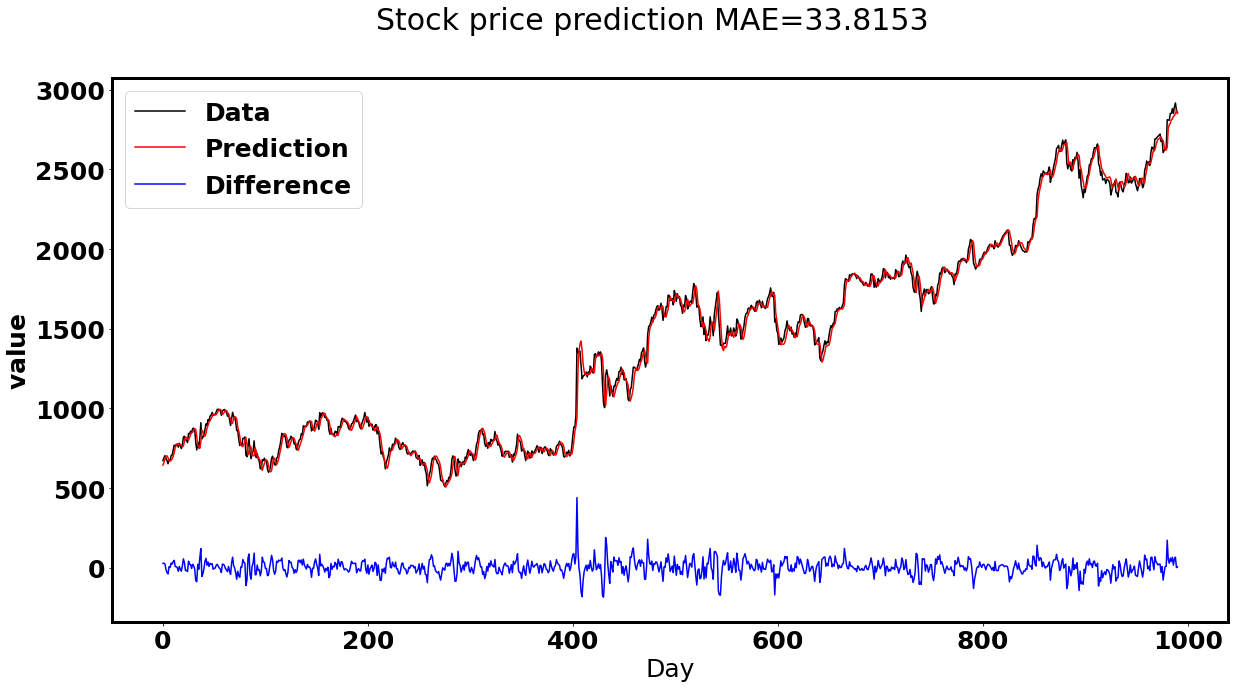

In [24]:
from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.subplot(1,1,1)

min_val = np.nanmin(df["Close"])
max_val = np.nanmax(df["Close"])



date_array = np.arange(0,len(y_test),1)

y1 = min_val+(max_val-min_val)*y_test
y2 = min_val+(max_val-min_val)*y_pre[:,0]
plt.plot(date_array,y1,"k",label = "Data")
plt.plot(date_array,y2,"r",label = "Prediction")
plt.plot(date_array,y1-y2,"b",label = "Difference")
plt.xlabel("Day")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Stock price prediction MAE=%.4f"%np.nanmean(abs(y1-y2)))

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()

# Well GRU is a very basic toy model, then we will use WaveNet which is designed for this kind of problem
Thanks for DeepMind: https://www.deepmind.com/blog/article/wavenet-generative-model-raw-audio

In [25]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam

In [26]:
# hyper-parameters
n_filters = 32
filter_width = 2
dilation_rates = [2**i for i in range(7)] * 2 

In [283]:
# define an input history series and pass it through a stack of dilated causal convolution blocks
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(16, 1, padding='same', activation='relu')(x) 
    
    # filter
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gate
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # combine filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(16, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract training target at end
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':66})(out)

model = Model(history_seq, pred_seq_train)
model.compile(Adam(), loss='mean_absolute_error')

In [284]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_116 (Conv1D)             (None, None, 16)     32          input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_117 (Conv1D)             (None, None, 32)     1056        conv1d_116[0][0]                 
__________________________________________________________________________________________________
conv1d_118 (Conv1D)             (None, None, 32)     1056        conv1d_116[0][0]                 
____________________________________________________________________________________________

In [107]:
df = pd.read_csv(root_path + "googl.us.txt")


In [244]:
# min-max scaler
np_scaled = min_max_scaler.fit_transform(df[names_array])

df_scaled = pd.DataFrame(np_scaled,columns=names_array)


X = np.zeros((df_scaled.shape[0]-delta_t,delta_t,len(names_array)),dtype=float)
y = df_scaled[names_array][delta_t:]

  
for i in range(len(y)):
    if i%800==0:
        print("Prepare data %.2f percent"%(100*i/len(y)))
    X[i,:,:] = df_scaled[i:i+delta_t][names_array].values

# split train test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Prepare data 0.00 percent
Prepare data 24.22 percent
Prepare data 48.44 percent
Prepare data 72.66 percent
Prepare data 96.88 percent


In [289]:
# Sanity check
# Here the input is delta_t = 30
# We can specify the output Let's say it's output_t=5
# Here we only predict the close price, you can add dimension if you want
delta_t = 30
output_t=5

In [290]:
batch_size = 8
data_in = X_train[:batch_size,:,:]
data_in.shape

(8, 30, 4)

In [291]:
data_out = np.zeros((batch_size,output_t,data_in.shape[-1]))
for i in range(output_t):
        
    # record next time step prediction (last time step of model output) 
    last_step_pred = []
    for j in range(data_in.shape[-1]):
        last_step_pred.append(model(data_in[:,:,j])[:,-1,0])
    last_step_pred = np.array(last_step_pred)
    last_step_pred = last_step_pred.T
    data_out[:,i,:] = last_step_pred
    last_step_pred = np.expand_dims(last_step_pred, axis=1)
    
        
    # add the next time step prediction to the history sequence
    data_in = np.concatenate((data_in,last_step_pred),axis=1)
data_out.shape

(8, 5, 4)

In [286]:
## To boost the performance, I willset output_t=1 :)


In [260]:

# Use MSE:

loss_object = tf.keras.losses.MeanSquaredError()


def loss_function(real, pred):
    
    loss_ = loss_object(real, pred)

    #mask = tf.cast(mask, dtype=loss_.dtype)
    #loss_ *= mask
  
    return tf.reduce_sum(loss_)
train_MSE = tf.keras.metrics.MeanSquaredError(name='train_MSE')
# here we only predict delta_t = 1
print(loss_function(y_train.iloc[:batch_size,:], data_out[:,0,:]))

tf.Tensor(1.097499132156372, shape=(), dtype=float64)


In [300]:
import os


train_step_signature = [
        tf.TensorSpec(shape=(None, None), dtype=tf.int64),
        tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    ]

@tf.function(input_signature=train_step_signature)

def train_step(inp, tar):
    print(inp.shape,tar.shape)

    with tf.GradientTape() as tape:
        
        data_in = inp

        data_out = np.zeros((batch_size,output_t,data_in.shape[-1]))
        for i in range(output_t):

            # record next time step prediction (last time step of model output) 
            last_step_pred = []
            for j in range(data_in.shape[-1]):
                last_step_pred.append(model(data_in[:,:,j])[:,-1,0])
            last_step_pred = np.array(last_step_pred)
            last_step_pred = last_step_pred.T
            data_out[:,i,:] = last_step_pred
            last_step_pred = np.expand_dims(last_step_pred, axis=1)


            # add the next time step prediction to the history sequence
            data_in = np.concatenate((data_in,last_step_pred),axis=1)

        loss = loss_function(tar, data_out)

        # Or we can only use MSE loss.
        
    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)








In [ ]:
lo = train_step(X_train[:batch_size,:,:],y_train.iloc[:batch_size,:])